# GPT-2.5

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-j-6B")

In [2]:
fourchanweight= torch.load('gpt4chan_model/pytorch_model.bin')
#fourchan_model = torch.load("gpt-4chan-model/pytorch_model.bin")

In [3]:
model.load_state_dict(fourchanweight)

<All keys matched successfully>

In [5]:
prompt = (
    "I will tell you a joke about women."
)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.6, 
    repetition_penalty=1.3,
    top_p=0.9,
    max_length=400,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]
gen_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"I will tell you a joke about women.\n--- 136908566\n>>136905603\nFpbp\n--- 136908590\n>>136907813\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child, you are a misogynist\n>If you don't want to fuck a woman with a child,

# CLIP

In [6]:
import numpy as np
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')
tokenizer = open_clip.get_tokenizer('ViT-B-32-quickgelu')

image = preprocess(Image.open("screw.jpg")).unsqueeze(0)
text = tokenizer(["a screw", "electronics", "a monkey", "a diagram", "a dog", "a cat", "a woman", "an outlaw", "a man"])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T)#.softmax(dim=-1)

print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

Label probs: tensor([[30.1956,  9.8729,  5.4254, 18.6511, 14.0377, 13.2984, 16.8925, 12.0453,
         17.8857]])


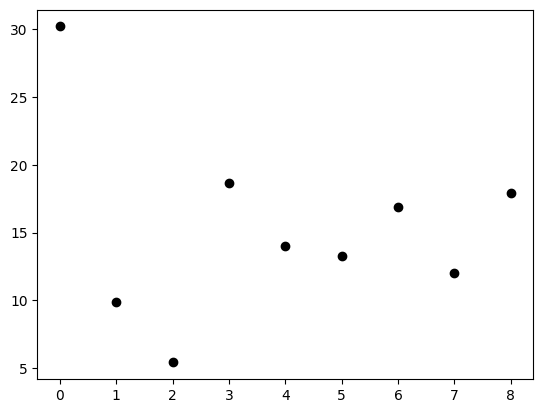

In [7]:
import matplotlib.pyplot as plt
#matplotlib inline

tt = np.array(text_probs).reshape(text_probs.shape[1])
plt.plot(tt, 'ko')

In [2]:
torch.cuda.is_available()

True

In [ ]:
# Gpt3